In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import np_utils
from tensorflow import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
pinsoro = pd.read_csv('combine_child_robot_1.csv', low_memory = False)

In [3]:
qamqor = pd.read_csv('qamqor_updated.csv')

# Qamqor without transfer learning

In [4]:
#Features and labels for qamqor
X_q = np.array(qamqor[qamqor.columns[0:176]])
y_q = np.array(qamqor['engagement_bin'])

In [5]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xq_train, Xq_rem, yq_train, yq_rem = train_test_split(X_q, y_q, train_size=0.8, random_state=123, stratify=y_q)
Xq_valid, Xq_test, yq_valid, yq_test = train_test_split(Xq_rem,yq_rem, test_size=0.5, random_state=123, stratify=yq_rem)

In [6]:
#Sets' shapes for qamqor
print(Xq_train.shape), print(yq_train.shape)
print(Xq_valid.shape), print(yq_valid.shape)
print(Xq_test.shape), print(yq_test.shape)

(77680, 176)
(77680,)
(9710, 176)
(9710,)
(9711, 176)
(9711,)


(None, None)

In [72]:
#Neural network model for qamqor
model_qamqor = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qamqor.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [73]:
#training
history_q = model_qamqor.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 5.0944 - accuracy: 0.6973 - val_loss: 0.5907 - val_accuracy: 0.7309
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7283 - val_loss: 0.5780 - val_accuracy: 0.7313
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7306 - val_loss: 0.6276 - val_accuracy: 0.7313
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7314 - val_loss: 0.5802 - val_accuracy: 0.7312
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7320 - val_loss: 0.5749 - val_accuracy: 0.7318
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7322 - val_loss: 0.5694 - val_accuracy: 0.7316
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7326 - val_loss: 0.5668 - val_accuracy: 0.7326
Epoch 8/15
78/78 [==

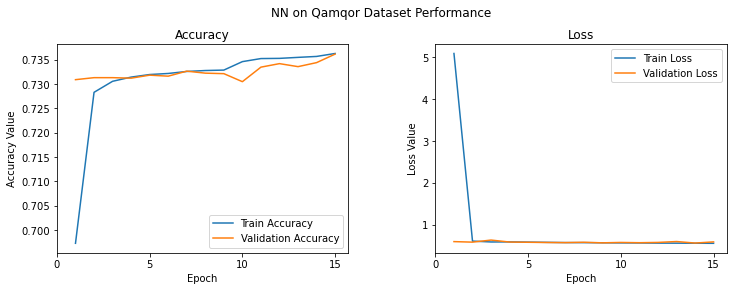

In [74]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_q.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_q.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_q.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_q.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [75]:
scores_q = model_qamqor.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 550us/step - loss: 0.5863 - accuracy: 0.7362


In [76]:
pred_yq = np.round(model_qamqor.predict(Xq_test))

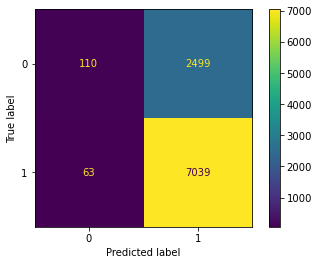

In [77]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq))
disp.plot()

# Model for Pinsoro

In [7]:
#Features and labels for pinsoro
X_p = np.array(pinsoro[pinsoro.columns[0:176]])
y_p = pinsoro['purple_child_social_engagement']
#one hot encoding
y_p = np_utils.to_categorical(y_p)

In [8]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xp_train, Xp_rem, yp_train, yp_rem = train_test_split(X_p, y_p, train_size=0.8, random_state=123, stratify=y_p)
Xp_valid, Xp_test, yp_valid, yp_test = train_test_split(Xp_rem, yp_rem, test_size=0.5, random_state=123, stratify=yp_rem)

In [9]:
#Sets' shapes for pinsoro
print(Xp_train.shape), print(yp_train.shape)
print(Xp_valid.shape), print(yp_valid.shape)
print(Xp_test.shape), print(yp_test.shape)

(2086543, 176)
(2086543, 6)
(260818, 176)
(260818, 6)
(260818, 176)
(260818, 6)


(None, None)

In [10]:
#Neural network model for pinsoro
model_pinsoro = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(6,activation = 'softmax')
    ])
model_pinsoro.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [11]:
#training
history_p = model_pinsoro.fit(Xp_train, yp_train, validation_data=(Xp_valid, yp_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
209/209 [==============================] - 8s 37ms/step - loss: 1.6464 - accuracy: 0.2917 - val_loss: 1.6131 - val_accuracy: 0.3238
Epoch 2/50
209/209 [==============================] - 6s 28ms/step - loss: 1.6071 - accuracy: 0.3276 - val_loss: 1.5984 - val_accuracy: 0.3332
Epoch 3/50
209/209 [==============================] - 6s 31ms/step - loss: 1.5896 - accuracy: 0.3413 - val_loss: 1.5737 - val_accuracy: 0.3541
Epoch 4/50
209/209 [==============================] - 6s 28ms/step - loss: 1.5761 - accuracy: 0.3510 - val_loss: 1.5711 - val_accuracy: 0.3513
Epoch 5/50
209/209 [==============================] - 6s 29ms/step - loss: 1.5657 - accuracy: 0.3579 - val_loss: 1.5576 - val_accuracy: 0.3643
Epoch 6/50
209/209 [==============================] - 6s 29ms/step - loss: 1.5562 - accuracy: 0.3642 - val_loss: 1.5533 - val_accuracy: 0.3661
Epoch 7/50
209/209 [==============================] - 6s 30ms/step - loss: 1.5477 - accuracy: 0.3693 - val_loss: 1.5286 - val_accuracy: 0.3844

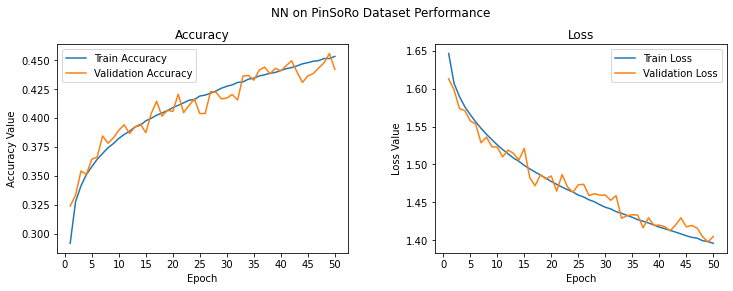

In [12]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
#testing
scores_p = model_pinsoro.evaluate(Xp_test, yp_test, verbose = 1)

8151/8151 [==============================] - 19s 2ms/step - loss: 1.4023 - accuracy: 0.4440


In [14]:
pred_yp = np.argmax(model_pinsoro.predict(Xp_test), axis = 1)

In [15]:
true_yp = np.argmax(yp_test, axis = 1)

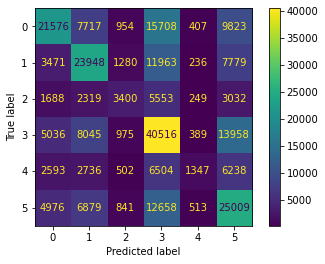

In [16]:
# Confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix(true_yp, pred_yp))
disp2.plot()

# Transfer learning for Qamqor


In [17]:
model_temp = model_pinsoro

In [18]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp.layers[:-1]:
    layer.trainable = False


In [19]:
model_tl = Sequential(
    [
    model_temp,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)

In [20]:
model_tl.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [21]:
#Training for qamqor with transfer learning - method 2
history_tl = model_tl.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 9ms/step - loss: 0.6623 - accuracy: 0.6019 - val_loss: 0.6453 - val_accuracy: 0.6960
Epoch 2/15
78/78 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7127 - val_loss: 0.6184 - val_accuracy: 0.7220
Epoch 3/15
78/78 [==============================] - 1s 7ms/step - loss: 0.6083 - accuracy: 0.7243 - val_loss: 0.6030 - val_accuracy: 0.7241
Epoch 4/15
78/78 [==============================] - 0s 6ms/step - loss: 0.5954 - accuracy: 0.7254 - val_loss: 0.5930 - val_accuracy: 0.7251
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7268 - val_loss: 0.5865 - val_accuracy: 0.7264
Epoch 6/15
78/78 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7278 - val_loss: 0.5847 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7313 - val_loss: 0.5823 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

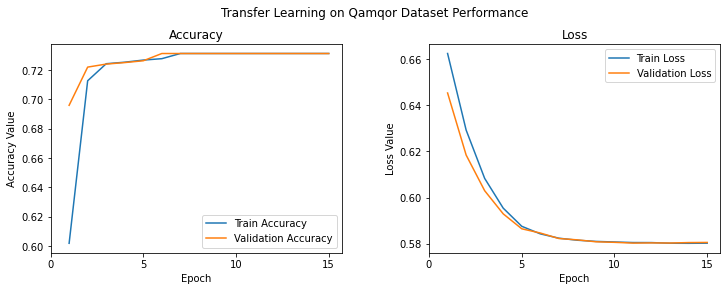

In [22]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [23]:
#testing
scores_tl = model_tl.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.7313


In [24]:
pred_ytl_q = np.round(model_tl.predict(Xq_test))

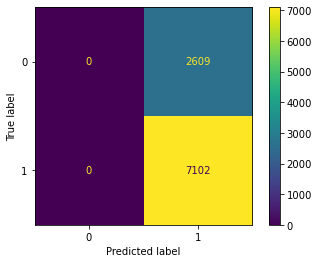

In [25]:
disp3 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_ytl_q))
disp3.plot()

# Model for Pinsoro if binary classification is used


In [23]:
#Drop labels that are zero (missing)
pinsoro2 = pinsoro[pinsoro['purple_child_social_engagement'] != 0]

In [24]:
#Replace 1 and 2 with 0; 3, 4, and 5 with 1
pinsoro2['purple_child_social_engagement'].replace(to_replace = 1, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 2, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 3, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 4, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 5, value=1, inplace= True)

C:\Users\karin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
#Features and labels for pinsoro2
X_p2 = np.array(pinsoro2[pinsoro2.columns[0:176]])
y_p2 = pinsoro2['purple_child_social_engagement']


In [26]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro2
Xp2_train, Xp2_rem, yp2_train, yp2_rem = train_test_split(X_p2, y_p2, train_size=0.8, random_state=123, stratify=y_p2)
Xp2_valid, Xp2_test, yp2_valid, yp2_test = train_test_split(Xp2_rem,yp2_rem, test_size=0.5, random_state=123, stratify=yp2_rem)

In [27]:
#Sets' shapes for pinsoro2
print(Xp2_train.shape), print(yp2_train.shape)
print(Xp2_valid.shape), print(yp2_valid.shape)
print(Xp2_test.shape), print(yp2_test.shape)

(1637063, 176)
(1637063,)
(204633, 176)
(204633,)
(204633, 176)
(204633,)


(None, None)

In [31]:
#Neural network model
model_pinsoro2 = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_pinsoro2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [32]:
#training
history_p2 = model_pinsoro2.fit(Xp2_train, yp2_train, validation_data=(Xp2_valid, yp2_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
164/164 [==============================] - 6s 37ms/step - loss: 0.6133 - accuracy: 0.6843 - val_loss: 0.6112 - val_accuracy: 0.6890
Epoch 2/50
164/164 [==============================] - 5s 30ms/step - loss: 0.5995 - accuracy: 0.6922 - val_loss: 0.5924 - val_accuracy: 0.6960
Epoch 3/50
164/164 [==============================] - 4s 27ms/step - loss: 0.5922 - accuracy: 0.6974 - val_loss: 0.5926 - val_accuracy: 0.6926
Epoch 4/50
164/164 [==============================] - 5s 30ms/step - loss: 0.5867 - accuracy: 0.7008 - val_loss: 0.5907 - val_accuracy: 0.6975
Epoch 5/50
164/164 [==============================] - 5s 29ms/step - loss: 0.5820 - accuracy: 0.7036 - val_loss: 0.5780 - val_accuracy: 0.7031
Epoch 6/50
164/164 [==============================] - 5s 32ms/step - loss: 0.5781 - accuracy: 0.7067 - val_loss: 0.5775 - val_accuracy: 0.7107
Epoch 7/50
164/164 [==============================] - 4s 23ms/step - loss: 0.5746 - accuracy: 0.7094 - val_loss: 0.5733 - val_accuracy: 0.7136

In [33]:
#testing
scores_p2 = model_pinsoro2.evaluate(Xp2_test, yp2_test, verbose = 1)

6395/6395 [==============================] - 5s 797us/step - loss: 0.5161 - accuracy: 0.7504


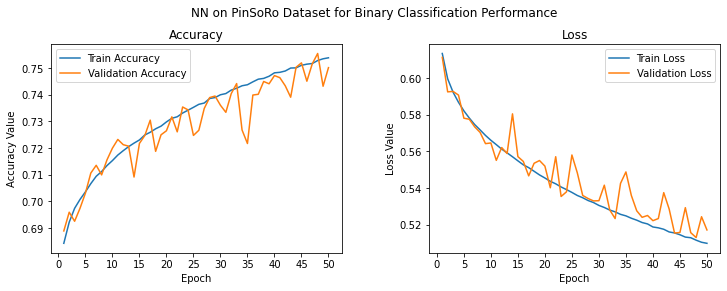

In [34]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [35]:
pred_yp2 = np.round(model_pinsoro2.predict(Xp2_test))

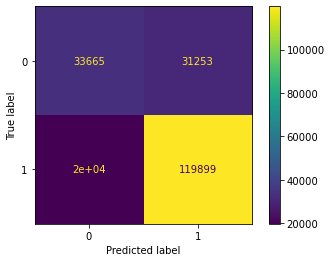

In [36]:
disp4 = ConfusionMatrixDisplay(confusion_matrix(yp2_test, pred_yp2))
disp4.plot()

# Transfer learning with binary classification for Pinsoro

In [37]:
model_tl_bin = model_pinsoro2

In [38]:
#Freeze all layers till the last one so that they are not trained
for layer in model_tl_bin.layers[:-1]:
    layer.trainable = False


In [39]:
model_tl_bin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [40]:
#Training for qamqor with transfer learning
history_tl_bin = model_tl_bin.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 0s 5ms/step - loss: 747.0262 - accuracy: 0.4563 - val_loss: 672.1505 - val_accuracy: 0.4753
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 602.6208 - accuracy: 0.4877 - val_loss: 540.6107 - val_accuracy: 0.5077
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 481.2348 - accuracy: 0.5185 - val_loss: 429.9128 - val_accuracy: 0.5364
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 383.3008 - accuracy: 0.5510 - val_loss: 345.2643 - val_accuracy: 0.5713
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 313.1112 - accuracy: 0.5821 - val_loss: 286.9694 - val_accuracy: 0.5977
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 264.4100 - accuracy: 0.6039 - val_loss: 244.7142 - val_accuracy: 0.6141
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 226.7241 - accuracy: 0.6204 - val_loss: 212.0507 - val_accuracy:

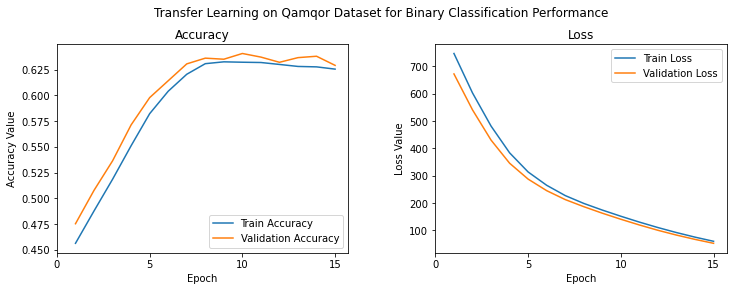

In [41]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_bin.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_bin.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_bin.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_bin.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [42]:
#testing qamqor
scores_tl_bin = model_tl_bin.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 765us/step - loss: 52.6895 - accuracy: 0.6159


In [43]:
pred_yq_tl_bin = np.round(model_pinsoro2.predict(Xq_test))

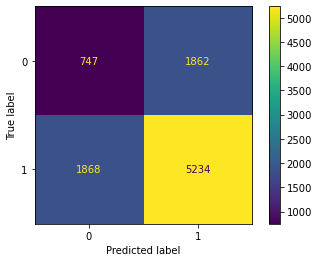

In [44]:
disp5 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq_tl_bin))
disp5.plot()

# Qamqor - only keypoints for face

In [13]:
#Features and labels for qamqor
X_qf = np.array(qamqor[qamqor.columns[0:139]])
y_qf = np.array(qamqor['engagement_bin'])

In [14]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xqf_train, Xqf_rem, yqf_train, yqf_rem = train_test_split(X_qf, y_qf, train_size=0.8, random_state=123, stratify=y_qf)
Xqf_valid, Xqf_test, yqf_valid, yqf_test = train_test_split(Xqf_rem,yqf_rem, test_size=0.5, random_state=123, stratify=yqf_rem)

In [30]:
#Neural network model for qamqor
model_qf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [31]:
#training
history_qf = model_qf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 4.2913 - accuracy: 0.6148 - val_loss: 1.2040 - val_accuracy: 0.3696
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.8636 - accuracy: 0.6971 - val_loss: 0.6789 - val_accuracy: 0.7309
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.7264 - accuracy: 0.7269 - val_loss: 0.6661 - val_accuracy: 0.7307
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.7313 - val_loss: 0.6394 - val_accuracy: 0.7301
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.7294 - val_loss: 0.6391 - val_accuracy: 0.7313
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.7313 - val_loss: 0.6278 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7313 - val_loss: 0.6176 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

In [32]:
scores_qf = model_qf.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 566us/step - loss: 0.5820 - accuracy: 0.7313


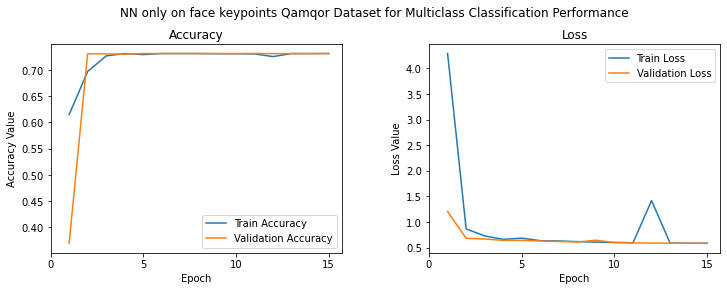

In [33]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints Qamqor Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_qf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_qf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_qf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_qf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [34]:
pred_yqf = np.round(model_qf.predict(Xqf_test))

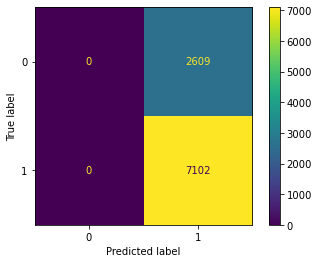

In [35]:
# Confusion matrix
disp6 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_yqf))
disp6.plot()

# Model for Pinsoro - face only
 

In [4]:
#Features and labels for pinsoro
X_pf = np.array(pinsoro[pinsoro.columns[0:139]])
y_pf = pinsoro['purple_child_social_engagement']
#one hot encoding
y_pf = np_utils.to_categorical(y_pf)

In [5]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xpf_train, Xpf_rem, ypf_train, ypf_rem = train_test_split(X_pf, y_pf, train_size=0.8, random_state=123, stratify=y_pf)
Xpf_valid, Xpf_test, ypf_valid, ypf_test = train_test_split(Xpf_rem, ypf_rem, test_size=0.5, random_state=123, stratify=ypf_rem)

In [6]:
#Neural network model for pinsoro
model_pf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(6,activation = 'softmax')
    ])
model_pf.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [7]:
#training
history_pf = model_pf.fit(Xpf_train, ypf_train, validation_data=(Xpf_valid, ypf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
209/209 [==============================] - 5s 23ms/step - loss: 1.6643 - accuracy: 0.2776 - val_loss: 1.6480 - val_accuracy: 0.2994
Epoch 2/50
209/209 [==============================] - 4s 21ms/step - loss: 1.6447 - accuracy: 0.2938 - val_loss: 1.6383 - val_accuracy: 0.2901
Epoch 3/50
209/209 [==============================] - 4s 20ms/step - loss: 1.6341 - accuracy: 0.3030 - val_loss: 1.6245 - val_accuracy: 0.3200
Epoch 4/50
209/209 [==============================] - 4s 20ms/step - loss: 1.6270 - accuracy: 0.3099 - val_loss: 1.6337 - val_accuracy: 0.2975
Epoch 5/50
209/209 [==============================] - 4s 20ms/step - loss: 1.6209 - accuracy: 0.3159 - val_loss: 1.6188 - val_accuracy: 0.3187
Epoch 6/50
209/209 [==============================] - 4s 20ms/step - loss: 1.6166 - accuracy: 0.3182 - val_loss: 1.6219 - val_accuracy: 0.3147
Epoch 7/50
209/209 [==============================] - 4s 20ms/step - loss: 1.6114 - accuracy: 0.3223 - val_loss: 1.6114 - val_accuracy: 0.3050

In [8]:
#testing
scores_pf = model_pf.evaluate(Xpf_test, ypf_test, verbose = 1)

8151/8151 [==============================] - 6s 734us/step - loss: 1.5162 - accuracy: 0.3902


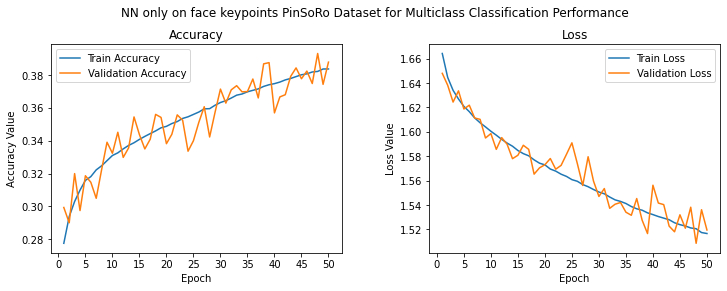

In [9]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_pf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_pf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_pf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_pf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [10]:
pred_ypf = np.argmax(model_pf.predict(Xpf_test), axis = 1)

In [11]:
true_ypf = np.argmax(ypf_test, axis = 1)

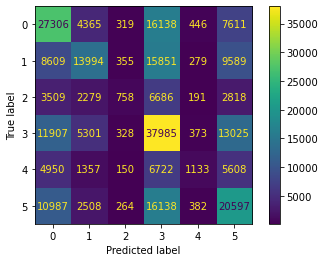

In [12]:
disp7 = ConfusionMatrixDisplay(confusion_matrix(true_ypf, pred_ypf))
disp7.plot()

# Transfer learning for Qamqor - only face


In [44]:
model_temp2 = model_pf

In [45]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp2.layers[:-1]:
    layer.trainable = False


In [46]:
model_tl_pf = Sequential(
    [
    model_temp2,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)
model_tl_pf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])


In [47]:
#Training for qamqor with transfer learning - method 2
history_tl_pf = model_tl_pf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 0s 4ms/step - loss: 0.7497 - accuracy: 0.4765 - val_loss: 0.7317 - val_accuracy: 0.4832
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5005 - val_loss: 0.6869 - val_accuracy: 0.5188
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5387 - val_loss: 0.6471 - val_accuracy: 0.5652
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6104 - val_loss: 0.6022 - val_accuracy: 0.6637
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7085 - val_loss: 0.5839 - val_accuracy: 0.7313
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7313 - val_loss: 0.5794 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7313 - val_loss: 0.5782 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

In [48]:
pred_ytl_pf = np.round(model_tl_pf.predict(Xqf_test))

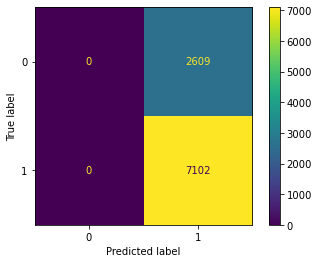

In [49]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_ytl_pf))
disp8.plot()

# Model for Pinsoro if binary classification is used - face only


In [28]:
#Features and labels
X_f = np.array(pinsoro2[pinsoro2.columns[0:139]])
y_f = pinsoro2['purple_child_social_engagement']

In [29]:
#Split to train, validation, and test sets in ratio 80:10:10
Xf_train, Xf_rem, yf_train, yf_rem = train_test_split(X_f, y_f, train_size=0.8, random_state=123, stratify=y_f)
Xf_valid, Xf_test, yf_valid, yf_test = train_test_split(Xf_rem,yf_rem, test_size=0.5, random_state=123, stratify=yf_rem)

In [30]:
#Neural network model
model_f = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_f.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [31]:
#training
history_f = model_f.fit(Xf_train, yf_train, validation_data=(Xf_valid, yf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
164/164 [==============================] - 4s 27ms/step - loss: 0.6215 - accuracy: 0.6826 - val_loss: 0.6150 - val_accuracy: 0.6841
Epoch 2/50
164/164 [==============================] - 3s 20ms/step - loss: 0.6124 - accuracy: 0.6841 - val_loss: 0.6106 - val_accuracy: 0.6839
Epoch 3/50
164/164 [==============================] - 4s 22ms/step - loss: 0.6092 - accuracy: 0.6852 - val_loss: 0.6067 - val_accuracy: 0.6853
Epoch 4/50
164/164 [==============================] - 3s 20ms/step - loss: 0.6065 - accuracy: 0.6861 - val_loss: 0.6043 - val_accuracy: 0.6870
Epoch 5/50
164/164 [==============================] - 3s 20ms/step - loss: 0.6040 - accuracy: 0.6875 - val_loss: 0.6054 - val_accuracy: 0.6854
Epoch 6/50
164/164 [==============================] - 3s 20ms/step - loss: 0.6023 - accuracy: 0.6883 - val_loss: 0.5979 - val_accuracy: 0.6869
Epoch 7/50
164/164 [==============================] - 3s 20ms/step - loss: 0.6006 - accuracy: 0.6906 - val_loss: 0.6008 - val_accuracy: 0.6949

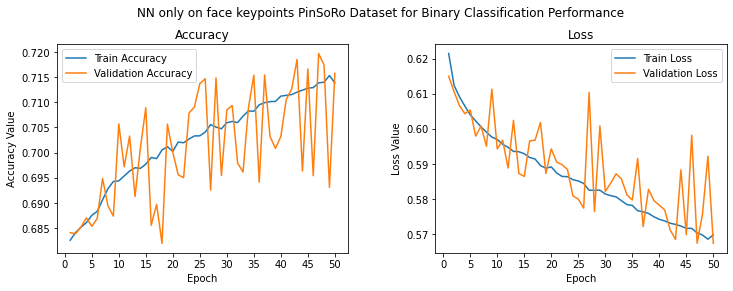

In [32]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [33]:
scores_f = model_f.evaluate(Xf_test, yf_test, verbose = 1)

6395/6395 [==============================] - 5s 739us/step - loss: 0.5673 - accuracy: 0.7165


In [34]:
pred_f = np.round(model_f.predict(Xf_test))

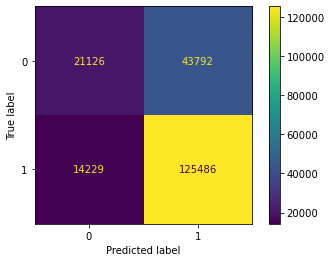

In [35]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yf_test, pred_f))
disp8.plot()

# Transfer learning for Pinsoro with binary classification - face only

In [36]:
model_tl_fbin = model_f

In [37]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_tl_fbin.layers[:-1]:
    layer.trainable = False


In [38]:

model_tl_fbin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [39]:
#Training for qamqor with transfer learning
history_tl_f = model_tl_fbin.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 0s 4ms/step - loss: 301.9370 - accuracy: 0.4299 - val_loss: 242.7140 - val_accuracy: 0.4742
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 207.2491 - accuracy: 0.5119 - val_loss: 173.4125 - val_accuracy: 0.5462
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 149.4435 - accuracy: 0.5671 - val_loss: 128.3092 - val_accuracy: 0.5926
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 110.0480 - accuracy: 0.6076 - val_loss: 95.5291 - val_accuracy: 0.6298
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 81.9726 - accuracy: 0.6419 - val_loss: 71.8751 - val_accuracy: 0.6519
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 60.0368 - accuracy: 0.6508 - val_loss: 50.3154 - val_accuracy: 0.6502
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 39.7285 - accuracy: 0.6484 - val_loss: 30.5025 - val_accuracy: 0.6505

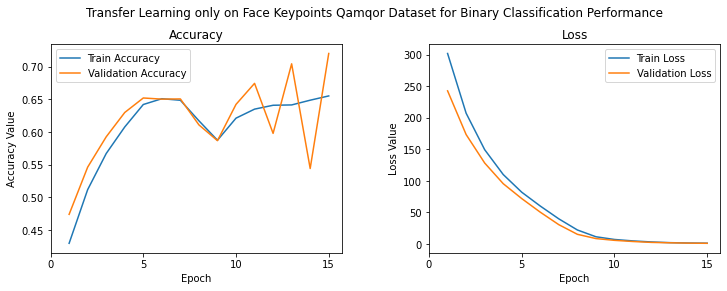

In [40]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning only on Face Keypoints Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [41]:
scores_tl_f = model_tl_fbin.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 683us/step - loss: 1.0935 - accuracy: 0.7189


In [42]:
pred_tl_f = np.round(model_tl_fbin.predict(Xqf_test))

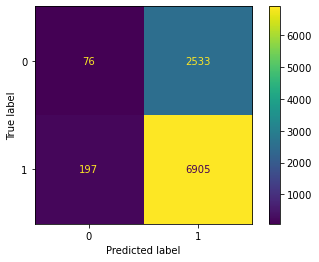

In [43]:
disp10 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_tl_f))
disp10.plot()